In [ ]:
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras.models import Sequential
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical


In [ ]:
x_train = []
x_test = []
y_train = []
y_test = []

for train in glob.glob("/content/drive/MyDrive/TruongHuy/Train/*.bmp"):
  a = cv2.imread(train)
  x_train.append(a)
  name = 'TruongHuy'
  if name in train:
    y_train.append([0])
x_train = np.array(x_train)
y_train = np.array(y_train)

for test in glob.glob("/content/drive/MyDrive/TruongHuy/Validation/*.bmp"):
  b = cv2.imread(test)
  x_test.append(b)
  name = 'TruongHuy'
  if name in test:
    y_test.append([0])
x_test = np.array(x_test)
y_test = np.array(y_test)



In [ ]:
x_train.shape

(125, 150, 150, 3)

In [ ]:
x_test.shape

(13, 150, 150, 3)

In [ ]:
y_test.shape

(13, 1)

In [ ]:
y_train.shape

(125, 1)

[0]


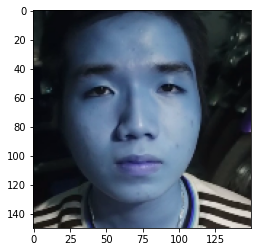

In [ ]:
plt.imshow(x_test[4])
print(y_test[4])

In [ ]:
x_train = x_train.reshape(125, 67500)
x_test = x_test.reshape(13, 67500)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = to_categorical(y_train, 1)
y_test = to_categorical(y_test, 1)

In [ ]:

model = Sequential()
model.add(Dense(512, kernel_initializer='normal', activation='relu', input_shape=(67500,)))  # 784: số tín hiệu đầu vào
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='softmax')) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               34560512  
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 34,823,681
Trainable params: 34,823,681
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
4/4 [==============================] - 2s 370ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
4/4 [==============================] - 1s 312ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
4/4 [==============================] - 1s 313ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 1s 312ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 1s 311ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 1s 313ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 1s 312ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss

In [ ]:
model.save('TruongHuy.h5')

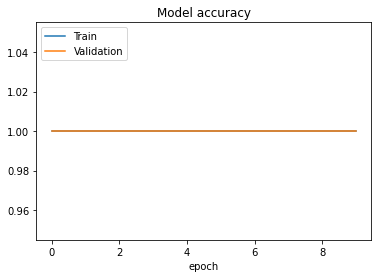

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Giá trị dự đoán: 0


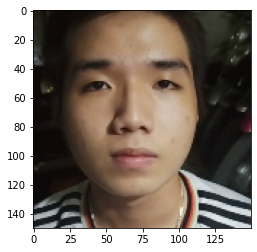

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

img = load_img('test.bmp', target_size=(150, 150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 67500)
img = img.astype('float32')
img = img / 255.0


# load model
model_final = load_model('TruongHuy.h5')
# predict the class
result = model.predict(img)
print('Giá trị dự đoán:', np.argmax(result))

